# Time Series Forecasting

Forecasting is a word we usually associate with the weather. While we listen to, or watch, the NEWS, there is always a separate segment called ‘Weather Report’ where the NEWS commentator provides us with the weather forecast information. Why is forecasting so important? Well, simply because we can make informed decisions.

**Predicion vs forecasting**

Prediction is concerned with estimating the outcomes for unseen data. For this purpose, you fit a model to a training data set, which results in an estimator f^(x) that can make predictions for new samples x.

Forecasting is a sub-discipline of prediction in which we are making predictions about the future, on the basis of time-series data. Thus, the only difference between prediction and forecasting is that we consider the temporal dimension. An estimator for forecasting has the form f^(x1,…,xt) where x1,…,xt indicate historic measurements at time points 1,…,t, while the estimate relates to time point t+1 or some other time in the future. Since the model depends on previous observations, xi, this is called an autoregressive model.

**Why weather forecasting and not weather prediction?**

With these definitions, we can now appreciate why weather forecasting is not called weather prediction: weather forecasting predicts the whether in the future using temporal information. For example, if there is a downpour at the moment, what is the likelihood that it will still rain in five minutes? Independent of all other features that influence the weather (e.g. atmospheric pressure and temperature), the likelihood that it will still rain in five minutes will be high because it is raining at the moment.

Imagine that we would perform weather prediction rather than forecasting. This would mean we were to ignore any temporal dimension and just consider the other physical features that influence the weather. Imagine that is still raining outside. Oddly the atmospheric pressure is quite high, which is associated with clear sky. So, when you are asking your prediction model to estimate whether it is currently raining, the model would probably respond that it is unlikely to rain due to the high atmospheric pressure.

**Challenges of forecasting**

One of the challenges of forecasting is finding the number of previous events that should be considered when making predictions about the future. This also depends on whether you are making about the immediate or the distant future. Let us consider the weather forecasting example again.

In order to predict the weather in 5 minutes, the most recent information about the weather carries the greatest weight. Most other physical features that are predictive of the weather can be ignored because, within such a short time span, the weather is probably not going to change much. Also, we do not need to look at the weather the day before to answer how the weather is going to be in five minutes.

However, imagine that you would like to know the weather for the next day. In this case, it would be wrong to only consider that is currently raining: maybe the rain is just an exception and the weather in the last days was very sunny. Thus, to make forecasts for the more distant future, we need to consider more distant historic events in order to capture the current weather trend. For example, if the historic trend indicates that the weather is becoming worse, this should be incorporated into the forecast.

So, for a forecasting model with exogenous inputs (e.g. weather features) you basically need to model two things:

    Model the exogenous, non-temporal features (the feature model).
    Model the historical, temporal data (the temporal model).

To obtain accurate forecasts, these models have to be combined judiciously such that the estimates of the temporal model are adjusted by the estimates from the feature model.

### Business Understanding :

Global Mart is an online supergiant store that has worldwide operations. It takes orders and delivers across the globe and  caters to 7 different geographical market segments - (Africa, APAC (Asia Pacific), Canada, EU (European Union), EMEA(Middle East), LATAM (Latin America), US (United States)). It deals with all the major product categories — Consumer, Corporate and Home Office.

### Aim :

 To forecast the sales for the most consistently profitable market-segment.

### Let's get started...

### 1. Import the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [7]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [8]:
import sklearn
from sklearn.metrics import mean_squared_error

### 2. Read and understand the data

In [9]:
data = pd.read_csv('Superstore.csv')
data.head()

,Order ID,Order Date,Customer ID,Segment,Market,Product ID,Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,CA-2012-124891,7/31/2012,RH-19495,Consumer,US,TEC-AC-10003033,Technology,2309.650,7,0.0,762.1845,933.57
1,IN-2013-77878,2/5/2013,JR-16210,Corporate,APAC,FUR-CH-10003950,Furniture,3709.395,9,0.1,-288.7650,923.63
2,IN-2013-71249,10/17/2013,CR-12730,Consumer,APAC,TEC-PH-10004664,Technology,5175.171,9,0.1,919.9710,915.49
3,ES-2013-1579342,1/28/2013,KM-16375,Home Office,EU,TEC-PH-10004583,Technology,2892.510,5,0.1,-96.5400,910.16
4,SG-2013-4320,11/5/2013,RH-9495,Consumer,Africa,TEC-SHA-10000501,Technology,2832.960,8,0.0,311.5200,903.04


In [10]:
# Check the shape of the data
data.shape

(51290, 12)

In [11]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       51290 non-null  object 
 1   Order Date     51290 non-null  object 
 2   Customer ID    51290 non-null  object 
 3   Segment        51290 non-null  object 
 4   Market         51290 non-null  object 
 5   Product ID     51290 non-null  object 
 6   Category       51290 non-null  object 
 7   Sales          51290 non-null  float64
 8   Quantity       51290 non-null  int64  
 9   Discount       51290 non-null  float64
 10  Profit         51290 non-null  float64
 11  Shipping Cost  51290 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.7+ MB


In [12]:
# Check the numerical data stats
data.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375818
std,487.565361,2.278766,0.212280,174.340972,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


### 3. Exploratory Data Analysis

**3.1 Missing values**

In [13]:
data.isnull().sum()

Order ID         0
Order Date       0
Customer ID      0
Segment          0
Market           0
Product ID       0
Category         0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

**Inference: There are no missing values in the data.**

**3.2 Outliers**

In [14]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375818
std,487.565361,2.278766,0.212280,174.340972,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
90%,632.225736,7.000000,0.500000,112.680000,65.130000
95%,1015.955640,8.000000,0.600000,211.500000,111.409500
99%,2301.000000,11.000000,0.700000,587.359950,286.754300


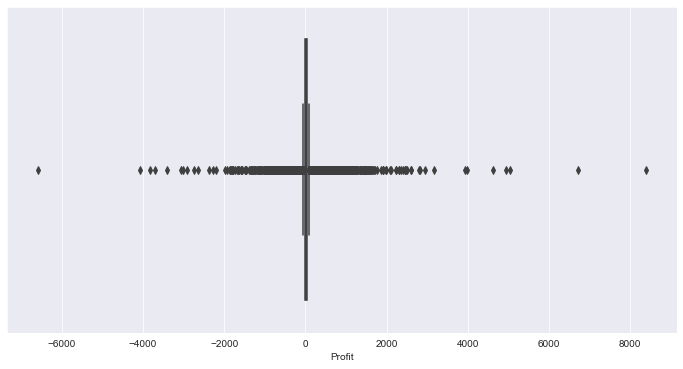

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Profit'])
plt.show()

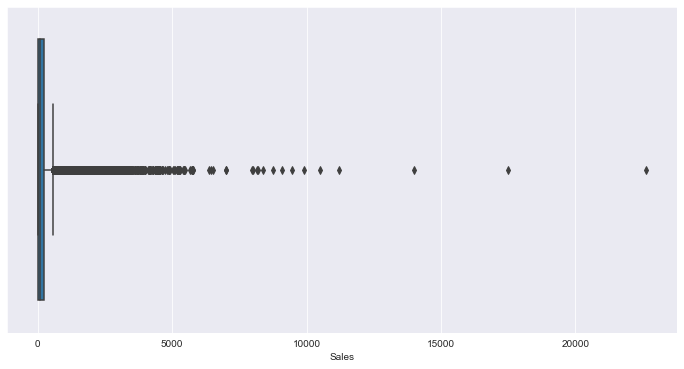

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

**Inference: We can clearly see that there are outliers in the data.**

**We will keep the outliers as they are. We cannot delete them as this is a time series data and deleting any data point will lead to discontinuity in the data.**

### 4. Data Preparation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       51290 non-null  object 
 1   Order Date     51290 non-null  object 
 2   Customer ID    51290 non-null  object 
 3   Segment        51290 non-null  object 
 4   Market         51290 non-null  object 
 5   Product ID     51290 non-null  object 
 6   Category       51290 non-null  object 
 7   Sales          51290 non-null  float64
 8   Quantity       51290 non-null  int64  
 9   Discount       51290 non-null  float64
 10  Profit         51290 non-null  float64
 11  Shipping Cost  51290 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.7+ MB


**Coverting the Order Date column to date time format.**

In [18]:
data['Order Date'].head()

data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m') # Converting the Order Date to month-Year format

data.head()

# Group the data by Order Date for sum of Sales
data1 = data.groupby(['Order Date'])['Sales'].sum()
data1.head()

In [35]:
data1 = pd.DataFrame(data1)

data1.index.to_timestamp()

### 5. Time series Decomposition

In [30]:
# Time Series Decomposition
# 1. Trend - Upwards or Downwards # we can find out
# 2. Seasonality - regular intervals - Rainfall
# 3. Cyclicity - irregular intervals
# 4. Randomness / Error - # we can't solve for 

In [43]:
data1 = pd.DataFrame(data1) # Convert to data frame
data1.index = data1.index.to_timestamp() # Converting the index to timestamp
data1.head()

,Sales
Order Date,
2011-01-01,98898.48886
2011-02-01,91152.15698
2011-03-01,145729.36736
2011-04-01,116915.76418
2011-05-01,146747.83610


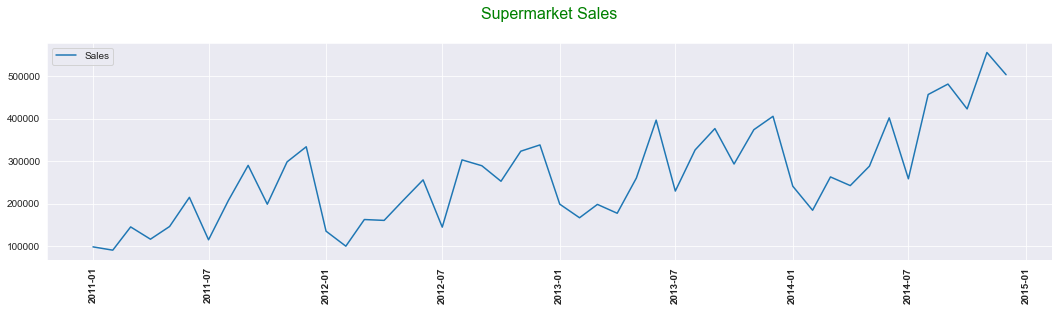

In [158]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Sales')
plt.legend(loc='best')
plt.title('Supermarket Sales\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

**Additive seasonal decomposition**

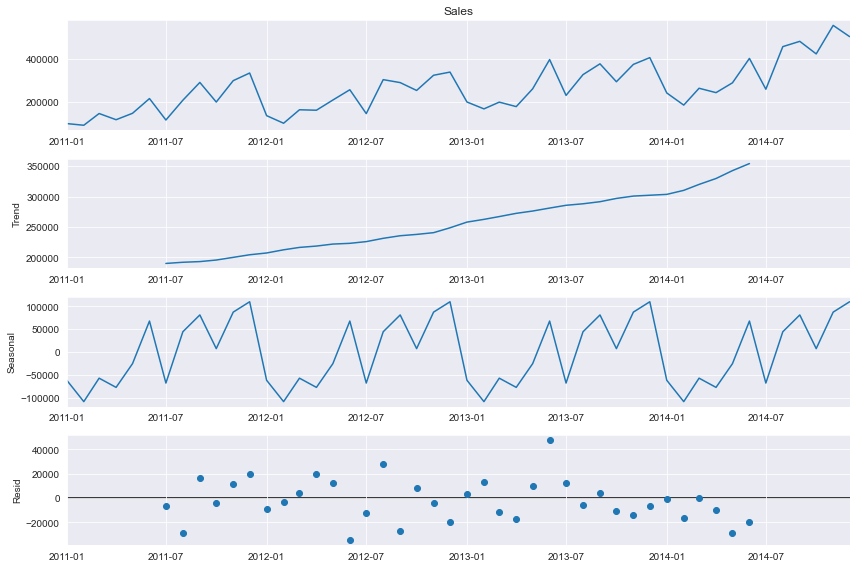

In [27]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

**Multiplicative seasonal decomposition**

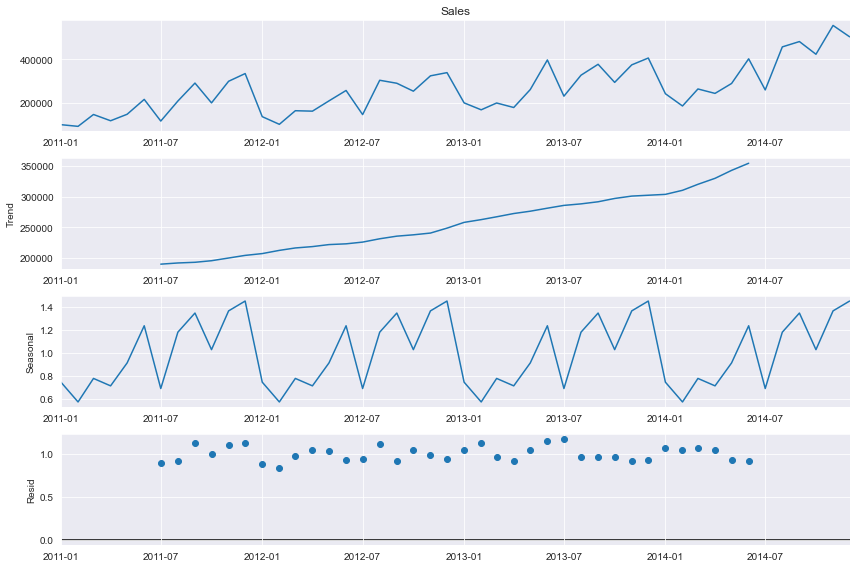

In [28]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

**Inference : The data contains level, trend and seasonality.**

### 6. Build and Evaluate Time Series Forecast

**Split the data into train and test sets.**

In [47]:
train_len = 42
train = data1[0 : train_len]
test = data1[train_len : ]

In [50]:
train.tail()

,Sales
Order Date,
2014-02-01,184837.35556
2014-03-01,263100.77262
2014-04-01,242771.86130
2014-05-01,288401.04614
2014-06-01,401814.06310


In [53]:
test.head()

,Sales
Order Date,
2014-07-01,258705.68048
2014-08-01,456619.94236
2014-09-01,481157.24370
2014-10-01,422766.62916
2014-11-01,555279.02700


### We build various Time Series Forecast models and compare the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) values for all the models. Lower values of RMSE and MAPE are desired to conclude that a model performs better.  Accuracy is calculated as (100 - MAPE). Lower the MAPE value, higher is the accuracy.

# How to Build an ARIMA Model for Forecasting in Python?

In [ ]:
# ARIMA

# AR - Auto Regressive  - regress its ownself, Y(t) -> Y(t-1) , Y(t-2) , Y(t-3)
# I - Integrated
# MA - Moving Average , SMA, EMA , EWMA, 

In [ ]:
# Stationarity of the time Series

# We have different strategies of transforming the time series to meet the stationarity conditions
# If one iteration does not give us a stationary time series, we take another iteration and check for stationarity
# Stationarity Check - Statistical functions -> ADF , KPSS

### To make the series stationary, we need to perform transformation and differencing.

### Check whether the time series is stationary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


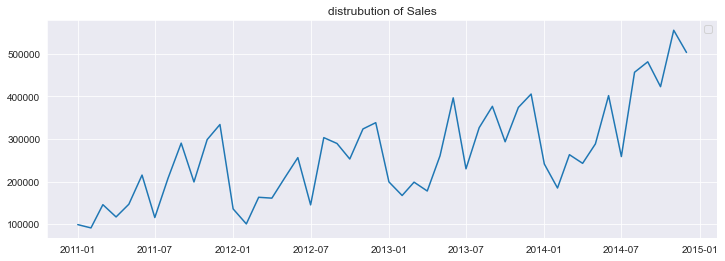

In [164]:
plt.figure(figsize=(12,4))
plt.plot(data1.Sales)
plt.legend(loc='best')
plt.title('distrubution of Sales')
plt.show()

### Augmented Dickey-Fuller (ADF) test

In [62]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: 0.618332
Critical Values @ 0.05: -2.94
p-value: 0.988059


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [63]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.816081
Critical Values @ 0.05: 0.46
p-value: 0.010000


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Box Cox transformation to make variance constant

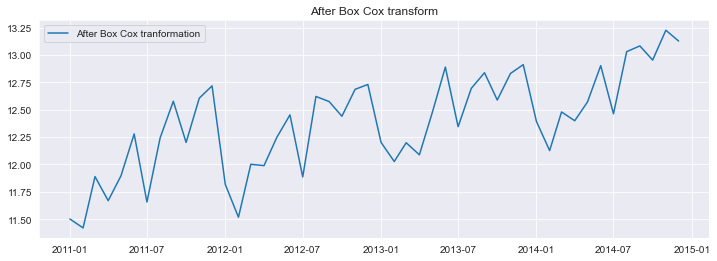

In [64]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

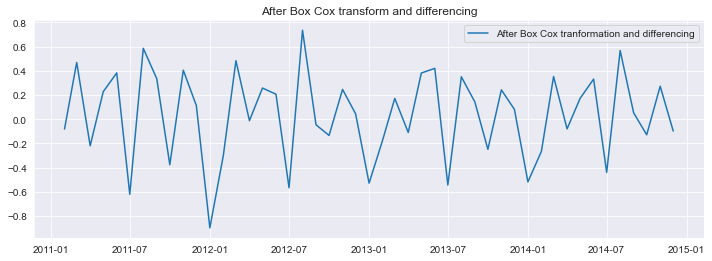

In [65]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [66]:
data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

In [67]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.568160
2014-09-01    0.052343
2014-10-01   -0.129374
2014-11-01    0.272650
2014-12-01   -0.098595
Freq: MS, dtype: float64

**Now let us see whether our series has become stationary.**

### Augmented Dickey-Fuller (ADF) test

In [68]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -11.890766
Critical Values @ 0.05: -2.95
p-value: 0.000000


**Inference : p-value is less than 0.05. This means that the series is stationary.**

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [69]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.187625
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Inference : p-value is greater than 0.05. This means the series is stationary.**

After one order difference this time series become stationary so d will be 1

### Train-Test Split

In [70]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [ ]:
# How mnay timestamps in the past should I look at to predict the future ? 
# y(t+1) = y(t), y(t-1) , y(t-2) , y(t-3) , y(t-4),

### Now let us proceed towards building various AR models to forecast the Sales.

first, we need to take care of its assumptions about the data and determine the parameters of the ARIMA(p, d, q) model. for d we already have the value

The next step in the ARIMA model is computing “p,” or the order for the autoregressive model. We can inspect the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

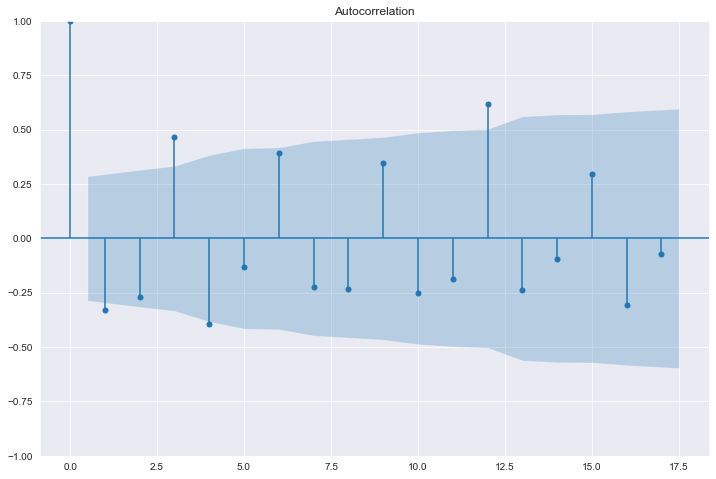

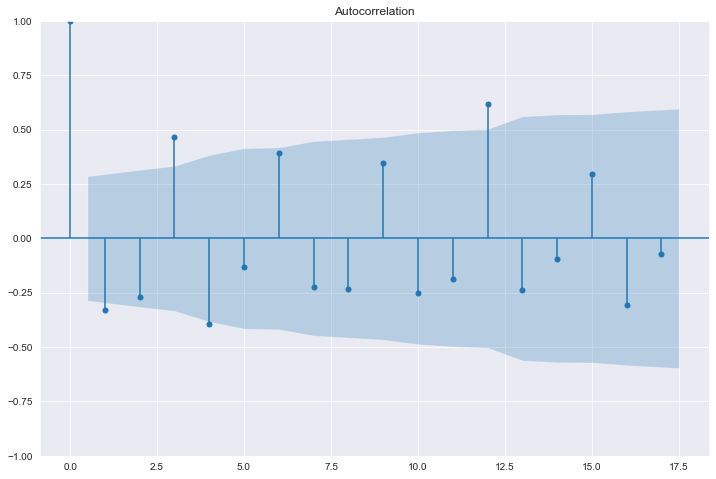

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_diff)

Finally, “q” can be estimated similarly by looking at the ACF plot instead of the PACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be between 1 and 4.

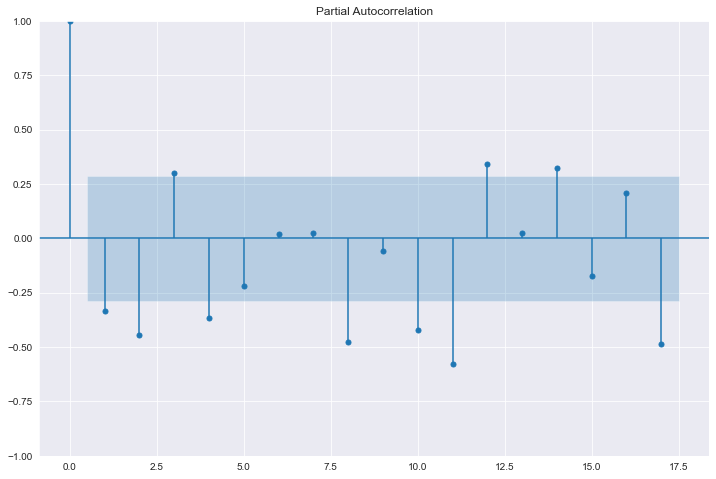

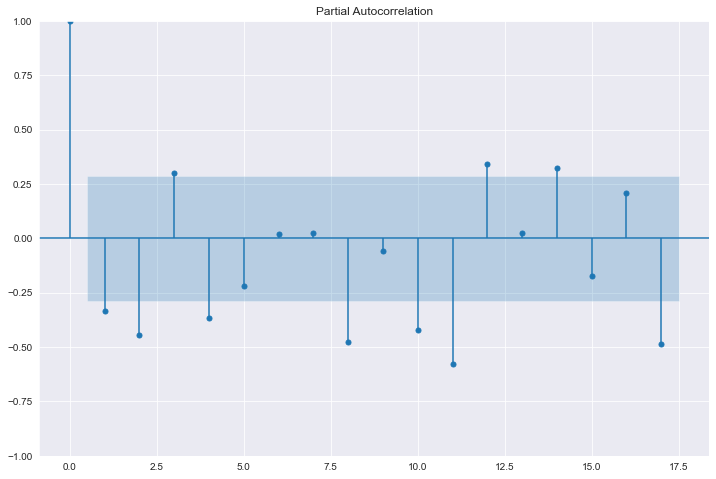

In [175]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_diff)

# Fit an ARIMA model

In [99]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(2, 1, 3)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.995081
ar.L2    -0.998483
ma.L1    -0.063260
ma.L2     0.047639
ma.L3    -0.984365
sigma2    0.063860
dtype: float64


In [100]:
# 1.Original - BCT - ln(x)
# 2.ln(x) -> differencing Approach
# 3.Differenced approach modelling 
# 2.Modelling -> Inverse of Differenced approach
# 1.Inverse BCT on the data

In [101]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

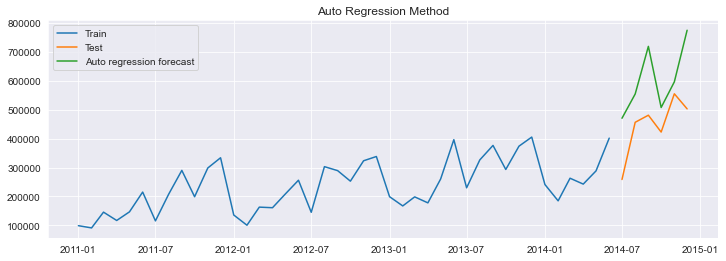

In [102]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [94]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['AR(4,1,0) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = tempResults
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"AR(4,1,0) method",643732.21,154.52


In [ ]:
# suppose I found out the optimal values of lag and moving average consideration using my ARIMA model;

# Train a Classical ML model 
# 1. Independent Features that I can control
# 2. Series Dependent Features - previous value of the series 

#                    X                                   y
# I1, I2, I3, SDL1, SDL2, SDL3, SDMA1, SDMA2,          Sales

### Seasonal auto regressive integrated moving average (SARIMA)

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(4, 1, 0), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.59446D-01    |proj g|=  2.94217D-01

At iterate    5    f= -3.77099D-01    |proj g|=  7.09140D-01

At iterate   10    f= -4.10284D-01    |proj g|=  3.53852D-01

At iterate   15    f= -4.13603D-01    |proj g|=  3.89816D-02

At iterate   20    f= -4.13692D-01    |proj g|=  9.64870D-03

At iterate   25    f= -4.13712D-01    |proj g|=  2.09734D-02

At iterate   30    f= -4.13751D-01    |proj g|=  1.75785D-02

At iterate   35    f= -4.14045D-01    |proj g|=  6.91135D-02

At iterate   40    f= -4.14132D-01    |proj g|=  4.23257D-03

At iterate   45    f= -4.14173D-01    |proj g|=  5.38428D-03

At iterate   50    f= -4.14190D-01    |proj g|=  5.27715D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [104]:
# Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

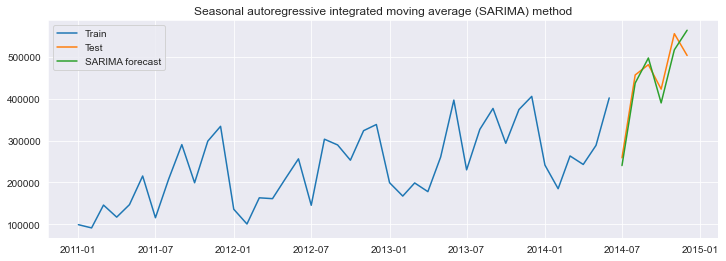

In [105]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [213]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA(4,1,0)) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,"AR(4,1,0) method",74568.10,13.23
0,"SARIMA(4,1,0)) method",34626.71,6.92


**Inference : SARIMA method performs the best among ARIMA set of models.**

In [1]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.9.13
